In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import os
path = 'D:\\FILESTEX\\2019_Probabilistic_guarantees_portfolio\\NYSE_2'
os.chdir(path)
fnames=['ahp.csv','alcoa.csv','amerb.csv','coke.csv','dow.csv','dupont.csv',\
        'ford.csv','ge.csv','gm.csv','hp.csv','ibm.csv','inger.csv','jnj.csv','kimbc.csv',\
       'merck.csv','mmm.csv','morris.csv','pandg.csv','schlum.csv']
names=['ahp','alcoa','amerb','coke','dow','dupont','ford','ge','gm','hp','ibm','inger','jnj','kimbc',\
       'merck','mmm','morris','pandg','schlum']
stocks=pd.concat([pd.read_csv(fname,header=None).drop(0,axis=1).rename(columns={1:fname}) for fname in fnames], axis=1)
stocks.columns=names
stocks.head()

,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
0,1.01515,1.02765,1.04183,1.00637,1.00847,1.01983,1.00000,1.00000,1.01026,1.01935,1.00429,1.01357,0.99683,1.05340,1.03148,1.03377,1.01495,1.00775,1.01176
1,1.01493,1.04036,0.98905,1.00475,1.00840,1.00833,1.00157,1.02187,0.99746,1.01266,0.99573,1.00446,1.00318,1.00461,1.00898,1.00251,1.00000,1.00192,1.01938
2,1.00000,0.97629,0.97786,0.98583,0.99722,0.99449,0.98116,0.97860,0.98219,0.98125,0.98571,0.99556,0.95873,0.98165,0.98043,0.95990,0.97218,0.98656,0.97338
3,1.02451,1.00662,1.02642,1.01917,0.99443,1.00693,1.02720,1.00795,0.98705,1.00637,1.01522,1.00000,1.01325,0.98131,1.01089,1.03655,0.99663,1.00778,1.00000
4,1.03100,0.98465,1.00368,1.00313,1.02801,1.00413,1.04361,1.00394,1.00525,1.03165,1.02427,1.01563,1.00654,1.02381,1.01077,0.99496,0.98649,1.01158,1.01563


In [13]:
stocks.shape

(11178, 19)

In [14]:
N=stocks.shape[0]
d=stocks.shape[1]
r=np.zeros((N,d))
r=stocks.to_numpy()

In [15]:
stocks.apply(np.log).corr()

,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
ahp,1.000000,0.219248,0.258873,0.339299,0.278589,0.289268,0.256957,0.358211,0.247053,0.235300,0.258679,0.236410,0.389621,0.256734,0.431491,0.316438,0.281480,0.332386,0.232661
alcoa,0.219248,1.000000,0.252616,0.260254,0.429980,0.407519,0.335487,0.378002,0.322186,0.279937,0.310897,0.362632,0.247533,0.252311,0.248300,0.355041,0.241392,0.235986,0.286158
amerb,0.258873,0.252616,1.000000,0.293947,0.282271,0.300477,0.265184,0.328497,0.258314,0.222257,0.239127,0.272025,0.269539,0.253189,0.243256,0.302461,0.342039,0.278571,0.217291
coke,0.339299,0.260254,0.293947,1.000000,0.350238,0.364651,0.303778,0.428572,0.309843,0.275344,0.312802,0.269633,0.394477,0.306578,0.354628,0.389088,0.337595,0.435788,0.266311
dow,0.278589,0.429980,0.282271,0.350238,1.000000,0.524389,0.372021,0.440892,0.380112,0.307291,0.341106,0.398528,0.310500,0.296633,0.299360,0.434690,0.283711,0.319442,0.306805
dupont,0.289268,0.407519,0.300477,0.364651,0.524389,1.000000,0.365317,0.451367,0.391179,0.309210,0.360262,0.375839,0.317372,0.305324,0.313979,0.452503,0.290921,0.347514,0.331467
ford,0.256957,0.335487,0.265184,0.303778,0.372021,0.365317,1.000000,0.421533,0.602715,0.312626,0.343989,0.329160,0.282144,0.245760,0.273349,0.344714,0.255478,0.271835,0.247349
ge,0.358211,0.378002,0.328497,0.428572,0.440892,0.451367,0.421533,1.000000,0.432960,0.387473,0.450930,0.380193,0.405883,0.322860,0.381286,0.457310,0.330034,0.393609,0.318113
gm,0.247053,0.322186,0.258314,0.309843,0.380112,0.391179,0.602715,0.432960,1.000000,0.317878,0.367804,0.337601,0.281715,0.254033,0.271263,0.367157,0.254641,0.278158,0.268061
hp,0.235300,0.279937,0.222257,0.275344,0.307291,0.309210,0.312626,0.387473,0.317878,1.000000,0.441579,0.279304,0.267325,0.197631,0.263892,0.334810,0.245171,0.246845,0.258109


In [16]:
cov=np.cov(np.log(r), rowvar=False)
for i in range(d):
    print(np.vectorize(round)(cov[i,0:d],6))

[2.58e-04 6.60e-05 6.00e-05 8.30e-05 7.50e-05 7.10e-05 7.60e-05 8.70e-05
 6.80e-05 8.60e-05 6.70e-05 6.80e-05 9.60e-05 6.40e-05 1.09e-04 7.40e-05
 7.70e-05 7.60e-05 7.20e-05]
[6.60e-05 3.46e-04 6.80e-05 7.40e-05 1.34e-04 1.16e-04 1.15e-04 1.07e-04
 1.03e-04 1.19e-04 9.30e-05 1.20e-04 7.10e-05 7.30e-05 7.30e-05 9.60e-05
 7.60e-05 6.30e-05 1.02e-04]
[6.00e-05 6.80e-05 2.11e-04 6.50e-05 6.90e-05 6.70e-05 7.10e-05 7.20e-05
 6.40e-05 7.40e-05 5.60e-05 7.10e-05 6.00e-05 5.70e-05 5.60e-05 6.40e-05
 8.40e-05 5.80e-05 6.10e-05]
[8.30e-05 7.40e-05 6.50e-05 2.35e-04 9.00e-05 8.60e-05 8.60e-05 9.90e-05
 8.10e-05 9.60e-05 7.70e-05 7.40e-05 9.30e-05 7.30e-05 8.60e-05 8.60e-05
 8.80e-05 9.50e-05 7.80e-05]
[7.50e-05 1.34e-04 6.90e-05 9.00e-05 2.80e-04 1.35e-04 1.15e-04 1.12e-04
 1.09e-04 1.17e-04 9.20e-05 1.19e-04 8.00e-05 7.70e-05 7.90e-05 1.05e-04
 8.10e-05 7.60e-05 9.80e-05]
[7.10e-05 1.16e-04 6.70e-05 8.60e-05 1.35e-04 2.35e-04 1.03e-04 1.05e-04
 1.03e-04 1.08e-04 8.90e-05 1.03e-04 7.50e-05 7.20e-

In [17]:
#corr=np.corrcoef(np.log(r), rowvar=False)
#for i in range(d):
#    print(np.vectorize(round)(corr[i,0:d],2))

In [7]:
#for i in range(d):
#    for j in range(d):
#        print(cov[i,j]-np.sqrt(cov[i,i])*np.sqrt(cov[j,j])*corr[i,j])

In [8]:
#L = np.linalg.cholesky(cov)
#for i in range(d):
#    print(np.vectorize(round)(L[i,0:d],4))

In [18]:
mu=np.mean(np.log(r),axis=0)
for i in range(d):
    print(i,mu[i])

0 0.00047387072759585546
1 0.00034306595660099485
2 0.0005110836528094719
3 0.0005280394297623968
4 0.000436792778645642
5 0.00032502495852828125
6 0.0003567214279194729
7 0.00047667294462524915
8 0.0002617048409259694
9 0.0005483555275162058
10 0.0003653120960748829
11 0.000413079452992994
12 0.0005933246550213262
13 0.0004799802351001883
14 0.000546094779424721
15 0.0004085709396190517
16 0.0007299668768228498
17 0.00047847225594984836
18 0.0005572075755420864


In [19]:
n_experiments=10000
X=np.ones(n_experiments)
N_days=252

In [20]:
def optimal_portfolio_SEG_unif(U,R,n_attempts=10**4,threshold=1/10**10):
    N=R.shape[0]
    d=R.shape[1]
    w_old=np.ones(d)/d
    w_new=np.zeros(d)
    attempt=0
    i=0
    while attempt<=n_attempts:
        i+=1
        k=np.random.randint(0,N)
        eta=np.random.rand()
        a=[w_old[j]*np.exp(eta*R[k,j]/(np.dot(w_old,R[k,:]))**(1-alpha)) for j in range(d)]
        w_new=a/np.sum(a)
        attempt+=1
        if U(w_new,R)>U(w_old,R)+threshold:
            w_old=w_new
            attempt=0
        if i%10000==0: print(s,i,100*w_old,U(w_old,R),eta)
        #print(i,100*w_old,U(w_old,R),eta) 
    return w_old, U(w_old,R), i

In [21]:
def refine(w,tol=1/10**3):
    d=w.shape[0]
    opt_num=[i for i in range(d) if w[i]>tol]
    not_opt_num=[i for i in range(d) if w[i]<=tol]
    w=w[opt_num]/np.sum(w[opt_num])    
    return opt_num, not_opt_num, w

In [22]:
def U(nu,r):
    if alpha==0:
        return np.mean(np.log(np.dot(r[0:N,:],nu)))
    else:
        return np.mean(np.dot(r[0:N,:],nu)**alpha)

In [23]:
n_realizations=40
n_experiments=10
s=0
alpha=0.2
opt_portf=np.zeros((n_experiments,d))
opt_portf_best=np.zeros((n_realizations,d))
opt_val=np.zeros(n_experiments)
X=np.ones(n_experiments)
r_rel=np.zeros((N,d))
f=open('portf.txt','ab')
for realization in range(n_realizations):
    np.random.seed(300+realization)
    r_artif=np.exp(np.random.multivariate_normal(mu,cov,N)) 
    for t in range(N):
        r_rel[t,:]=r_artif[t,:]/np.max(r_artif[t,:]) 
    for s in range(n_experiments): 
        np.random.seed(1000+s)         
        opt_portf[s,:], opt_val[s], _  = optimal_portfolio_SEG_unif(U,r_rel)
    opt_portf_best[realization,:]=opt_portf[np.argmax(opt_val),:]
    pb=np.reshape(opt_portf_best[realization,:],(1,d))
    np.savetxt(f,pb)
    print(realization)
f.close()

4 1.00596634e-04
 1.61216169e-04 1.16750445e-04 2.04272021e-04] 0.9949502016743882 0.37086613613774055
9 20000 [6.89497115e-05 1.07607358e-04 7.63929156e-05 1.22370351e-04
 1.42879051e-04 1.01908767e-04 1.20045606e-04 2.95199752e-04
 1.04188041e-04 9.99973887e+01 4.41345131e-04 1.83004783e-04
 1.61157405e-04 6.40070265e-05 1.00100815e-04 9.01222990e-05
 1.46675036e-04 1.04711535e-04 1.80642567e-04] 0.9949502018962525 0.4795256450552029
9 30000 [6.20264249e-05 9.45654255e-05 6.85521728e-05 1.09434447e-04
 1.27224905e-04 8.98371162e-05 1.10967344e-04 2.68299464e-04
 9.48843534e-05 9.99976475e+01 3.94575320e-04 1.65738633e-04
 1.45959328e-04 5.63166876e-05 9.17265596e-05 8.05562241e-05
 1.35928640e-04 9.19495780e-05 1.63964018e-04] 0.9949502020987194 0.35633983184422735
37
0 10000 [1.99539924e-04 1.16117279e-04 1.78534662e-03 1.19759020e-03
 1.28799783e-04 1.66243213e-04 8.69255961e-05 1.19664705e-04
 2.58801472e-04 9.59526421e-05 9.26939499e-05 1.55227531e-04
 8.50900190e-04 2.17740237e-

In [46]:
#for realization in range(n_realizations):
#   opt_num, _, w =refine(opt_portf_best[realization,:])
#   print(opt_num, w)

In [31]:
g = open('portf.txt')
portf_list=[]
for line in g:
    portf_list.append([float(x) for x in line.split()])
g.close()
nu_opt=np.asarray(portf_list)
n_realizations=150
for realization in range(n_realizations):
    opt_num, _, w =refine(nu_opt[realization,:])
    print(opt_num, w)

[2, 3, 13, 14] [0.14132007 0.015437   0.36654635 0.47669658]
[3, 18] [0.29509148 0.70490852]
[6, 9, 16] [0.13167705 0.46449913 0.40382382]
[9, 13, 16] [0.13666655 0.37439222 0.48894123]
[16] [1.]
[3, 12, 16] [0.20734878 0.20035104 0.59230018]
[9] [1.]
[9, 16] [0.47333529 0.52666471]
[9, 16] [0.27555452 0.72444548]
[16, 18] [0.63819454 0.36180546]
[3, 9, 12, 17] [0.43673705 0.2755079  0.05816247 0.22959258]
[1, 13] [0.46236727 0.53763273]
[16, 18] [0.77511323 0.22488677]
[9] [1.]
[3, 4, 16] [0.17754442 0.2126404  0.60981518]
[9, 13, 16, 18] [0.38029723 0.2469012  0.10018911 0.27261246]
[9, 18] [0.3253739 0.6746261]
[16, 17] [0.5059364 0.4940636]
[7, 16] [0.44090729 0.55909271]
[16] [1.]
[12, 14, 16] [0.17208766 0.08601927 0.74189307]
[12] [1.]
[12, 16] [0.36456128 0.63543872]
[11, 12, 16] [0.15773755 0.07379143 0.76847102]
[16] [1.]
[14, 16] [0.69321892 0.30678108]
[16, 18] [0.79926001 0.20073999]
[16, 18] [0.57363996 0.42636004]
[16, 18] [0.73141852 0.26858148]
[16] [1.]
[13, 16] [0.56

In [32]:
av_fractions=np.sum(nu_opt,axis=0)/n_realizations
refine(av_fractions)

([0, 1, 2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 16, 17, 18],
 [5, 8, 10, 15],
 array([0.0038503 , 0.00632285, 0.01423063, 0.02585148, 0.01160591,
        0.00476899, 0.00806057, 0.11450162, 0.01111238, 0.0695928 ,
        0.02884923, 0.05399247, 0.52648577, 0.00985951, 0.11091551]))

In [33]:
def U_true(nu,r):
    z=np.dot(r[0:N_large,:],nu) 
    if alpha==0:
        return np.mean(np.log(z))
    else:
        return np.mean(z**alpha)
U_opt=np.zeros(n_realizations)
N_large=10**7
r_large=np.zeros((N_large,d))
r_rel_large=np.zeros((N_large,d))
r_large=np.exp(np.random.multivariate_normal(mu,cov,N_large)) 
for t in range(N_large):
    r_rel_large[t,:]=r_large[t,:]/np.max(r_large[t,:])
for realization in range(n_realizations):
    U_opt[realization]=(U_true(nu_opt[realization,:],r_large)-1)*10**4
print(np.mean(U_opt),np.median(U_opt),np.percentile(U_opt,20),np.percentile(U_opt,10))

1.3927825334287824 1.4407992432774464 1.258261567488539 1.203665997146608


(array([ 1,  0,  2,  7, 20, 10, 13, 16, 16, 65], dtype=int64),
 array([0.97344748, 1.02863004, 1.0838126 , 1.13899517, 1.19417773,
        1.2493603 , 1.30454286, 1.35972543, 1.41490799, 1.47009056,
        1.52527312]))

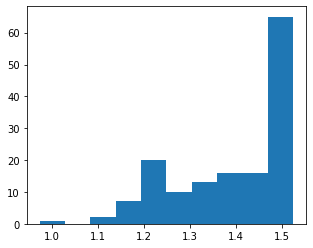

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(5,4))
axes.hist(U_opt) 
fig.savefig('hist_2.png', dpi=fig.dpi, bbox_inches='tight')
np.histogram(U_opt)

In [106]:
freq=np.sum(opt_portf>0.001,axis=0)/n_experiments

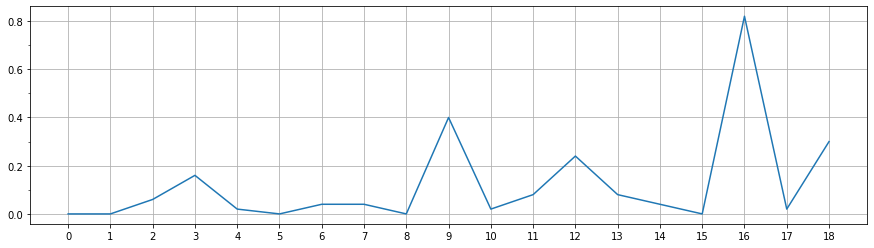

In [107]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(np.arange(0,d),freq)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

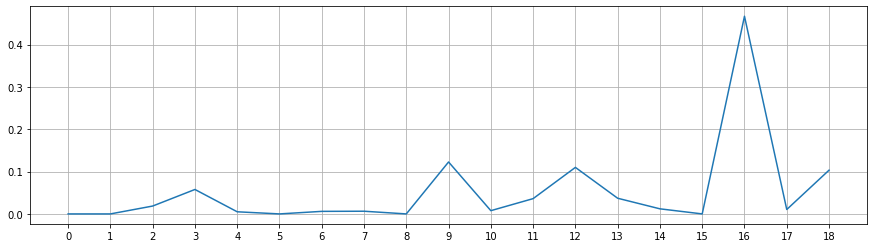

In [108]:
av_fractions=np.sum(opt_portf,axis=0)/n_experiments
fig, ax = plt.subplots(1, 1, figsize=(15,4))
plt.plot(np.arange(0,d),av_fractions)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

In [183]:
#alphas=[0.001,0.01,0.1,0.2,0.3,0.5,0.75,0.9,1]
#alphas=[0.001]
alphas=[0.01]
N_artif=11178
n_alphas=len(alphas)
n_experiments=5
opt_portf_al=np.zeros((n_experiments,d))
opt_val_al=np.zeros(n_experiments)
opt_portf_all=np.zeros((n_alphas,n_experiments,d))
X_all=np.zeros((n_alphas,n_experiments))
r_artif_rel=np.zeros((N_artif,d))
al=-1
X=np.ones(n_experiments)
for alpha in alphas:
    al=al+1
    X=np.ones(n_experiments)
    for s in range(n_experiments):
        X[s]=1
        np.random.seed(1+s)
        r_artif=np.exp(np.random.multivariate_normal(mu,cov,N_artif))
        # relative utility
        for t in range(N_artif):
            r_artif_rel[t,:]=r_artif[t,:]/np.max(r_artif[t,:])
        print(al,s)
        opt_portf_al[s,:], opt_val_al[s]  = optimal_portfolio_SEG_unif(U,r_artif_rel,threshold=1/10**10)
        opt_num, not_opt_num, w = refine(opt_portf_al[s,:])
        for t in range(N_artif):
            X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
        X_all[al,s]=X[s]
    opt_portf_all[al,:,:]=opt_portf_al    

0 0
0 1
0 2
0 3
0 4


In [180]:
print(opt_num)

[16]


In [181]:
X_all

array([[12625.40709612,  5394.61081125,  1005.05064376,  3522.27642009,
         5816.91131876]])

In [182]:
for k in range(n_experiments):
    opt_num, not_opt_num, w = refine(opt_portf_all[0,k,:])
    print('k:',k,opt_num,100*w)

k: 0 [16] [100.]
k: 1 [16] [100.]
k: 2 [18] [100.]
k: 3 [9] [100.]
k: 4 [16] [100.]


In [168]:
al=-1
for alpha in alphas:
    al=al+1
    z=X_all[al,:]
    print(z)
    print(stats.describe(z))

[1.42048281e-124 7.53185217e-125 1.32651511e-124 1.43147678e-125
 1.39948466e-125]
DescribeResult(nobs=5, minmax=(1.3994846619339702e-125, 1.4204828110026967e-124), mean=7.566558570561753e-125, variance=3.8053453317490345e-249, skewness=nan, kurtosis=nan)


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1087: RuntimeWarning: invalid value encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,


In [169]:
X=np.ones(n_experiments)
for s in range(n_experiments):
    for t in range(N_artif):
#    X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
        X[s]=X[s]*np.dot(opt_portf_all[0,s,:],r_artif[t,:]) 
X

array([1.39943952e-125, 1.39945342e-125, 5.11507562e-126, 3.12278912e-127,
       1.39945963e-125])

In [53]:
freq_all=np.zeros((n_alphas,d))
for al in range(n_alphas):
    opt_portf_al=opt_portf_all[al,:,:]
    freq_all[al,:]=np.sum(opt_portf_al>0.001,axis=0)/n_experiments
print(freq_all)
freq_all.shape

[[0.6 0.4 1.  0.8 0.6 0.4 0.1 0.6 0.1 0.7 0.3 0.5 0.6 0.2 0.9 0.4 1.  0.8
  0.6]]


(1, 19)

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(15,4))
ax.plot(np.arange(0,d),freq_all[2,:])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax.grid(which='major')

IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
stats.describe(opt_val_al)

In [ ]:
np.sum(opt_portf_al>0.001,axis=0)/n_experiments

In [ ]:
av_fractions_al=np.sum(opt_portf_al,axis=0)/n_experiments
plt.plot(np.arange(0,d),av_fractions_al)

In [ ]:
 100*opt_portf_al

In [ ]:
for s in range(n_experiments):
    opt_num, not_opt_num, w = refine(opt_portf_al[s,:])
    #print(opt_val_al[s],opt_num,w)  
    #X=1
    #Y=1
    for t in range(N_artif):
        X[s]=X[s]*np.dot(w,r_artif[t,opt_num])
    #   Y[s]=Y[s]*np.dot(opt_portf[s,:],r_artif[t,:])        
    print('X',X[s])

In [207]:
 X_all_ucbal.mean()

886.8111999943595

In [208]:
np.median(X_all_ucbal)

509.0318908200254

In [209]:
print(X_all_ucbal.min(),X_all_ucbal.max(),X_all_ucbal.var())

16.875746118696288 21968.850011879487 1955811.1852915802


NameError: name 'np' is not defined